For working with the model, we first import some packages and the modelclass:

In [1]:
#os.chdir('C:\\Users\\mpher\\Documents\\Uni\\Master\\02_Exchange\\01_Academics\\Energy Economics of the Green Transition\\0_Final Project\EnergyEconGroupWork')

In [2]:
import os
current_directory = os.getcwd()
print(current_directory)

/Users/paul/EnergyEcon/EnergyEconGroupWork


In [3]:
%run ./stdPackages.ipynb
from pyDbs import *

os.chdir(os.path.join(d['curr'], 'py'))

from mBasicPH_storage import *
os.chdir(d['curr'])

Next we load the database:

In [4]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables','StorageVariables','TransmissionLines'],
        'maps': ['LoadMaps','GeneratorsMaps','StorageMaps', 'MarketMaps'],
        'variable2D': ['HourlyVariation']}

path_to_data = os.path.join(d['curr'], 'Data', 'mBasicPH_storage_Data.xlsx')

db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

Convert variables to floats:

In [5]:
[db.__setitem__(var,db[var].astype(float).sort_index()) for var in db.getTypes('variable').keys()];

We need to read in heat areas manually:

In [6]:
db['g_H'] = db['g_E2g_H'].get_level_values('g_H')

Collect all areas in one:

In [7]:
db['g'] = db['g_E'].copy()

Finally, we will assume that linelosses and trade are zero such that the marginal willingness to pay and marginal generation costs of "transmission lines" does not have to be corrected. 

We then initialize and solve the model:

In [8]:
m = mSimple(db)
m()

/Users/paul/anaconda3/envs/EE2023/lib/python3.11/site-packages/pyDbs/base.py:289: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.sort_index().add(pd.Series(0, index = y).sort_index(),fill_value=fill_value) if (set(x_dom)-set(y_dom)) else pd.Series(0, index = y).sort_index().add(x.sort_index(),fill_value=fill_value)
/Users/paul/anaconda3/envs/EE2023/lib/python3.11/site-packages/pyDbs/base.py:289: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.sort_index().add(pd.Series(0, index = y).sort_index(),fill_value=fill_value) if (set(x_dom)-set(y_dom)) else pd.Series(0, index = y).sort_index().add(x.sort_index(),fill_value=fill_value)
/Users/paul/anaconda3/envs/EE2023/lib/python3.11/site-packages/pyDbs/base.py:289: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  return x.sort_index().add(pd.Series(0, index = y).s

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


In [14]:
# Example: Assuming 'Welfare', 'FuelConsumption', 'Emissions', etc., are columns in your DataFrame
result_columns = ['Welfare', 'FuelConsumption', 'Emissions', 'marginalSystemCosts_E', 'marginalSystemCosts_H', 'marginalEconomicValue', 'meanConsumerPrice_E', 'meanConsumerPrice_H']
# Extract relevant columns from self.db and create a DataFrame
result_df = pd.DataFrame({column: m.db[column] for column in result_columns})

# Export the DataFrame to Excel
result_df.to_excel(os.path.join(d['curr'], 'solutions.xlsx'), engine='openpyxl')

/var/folders/yp/j0c37_w920sg_vxm7smcssjw0000gn/T/ipykernel_32128/2501508323.py:4: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result_df = pd.DataFrame({column: m.db[column] for column in result_columns})
/var/folders/yp/j0c37_w920sg_vxm7smcssjw0000gn/T/ipykernel_32128/2501508323.py:4: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result_df = pd.DataFrame({column: m.db[column] for column in result_columns})
/var/folders/yp/j0c37_w920sg_vxm7smcssjw0000gn/T/ipykernel_32128/2501508323.py:4: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result_df = pd.DataFrame({column: m.db[column] for column in result_columns})


In [16]:
# Example: Assuming 'Welfare', 'FuelConsumption', 'Emissions', etc., are columns in your DataFrame
result_columns = ['Welfare', 'FuelConsumption', 'Emissions', 'marginalSystemCosts_E', 'marginalSystemCosts_H', 'marginalEconomicValue', 'meanConsumerPrice_E', 'meanConsumerPrice_H']

# Extract relevant columns from self.db and create a DataFrame
result_df = pd.DataFrame({column: m.db[column] for column in result_columns})

# Export the DataFrame to Excel with each variable on a separate sheet
excel_path = os.path.join(d['curr'], 'solutions.xlsx')

with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    for column in result_columns:
        result_df[[column]].to_excel(writer, sheet_name=column)


/var/folders/yp/j0c37_w920sg_vxm7smcssjw0000gn/T/ipykernel_32128/1980561573.py:5: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result_df = pd.DataFrame({column: m.db[column] for column in result_columns})
/var/folders/yp/j0c37_w920sg_vxm7smcssjw0000gn/T/ipykernel_32128/1980561573.py:5: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result_df = pd.DataFrame({column: m.db[column] for column in result_columns})
/var/folders/yp/j0c37_w920sg_vxm7smcssjw0000gn/T/ipykernel_32128/1980561573.py:5: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  result_df = pd.DataFrame({column: m.db[column] for column in result_columns})


In [17]:
db['Emissions']

g    EmissionType
DK1  CO2             1.428162e+07
DK2  CO2             2.774823e+06
dtype: float64

In [20]:
df = pd.DataFrame(db['marginalSystemCosts_E'])
df.to_excel(os.path.join(d['curr'], 'solutions_marginalSystemCosts_E.xlsx'), engine='openpyxl')

db['marginalSystemCosts_E']

g_E  h   
DK1  1         53.096936
     2         53.096936
     3         53.096936
     4         53.096936
     5         53.096936
                ...     
DK2  8756    1000.000000
     8757    1000.000000
     8758    1000.000000
     8759    1000.000000
     8760     158.259726
Name: 0, Length: 17520, dtype: float64

findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not found.
findfont: Font family 'Palatino Linotype' not 

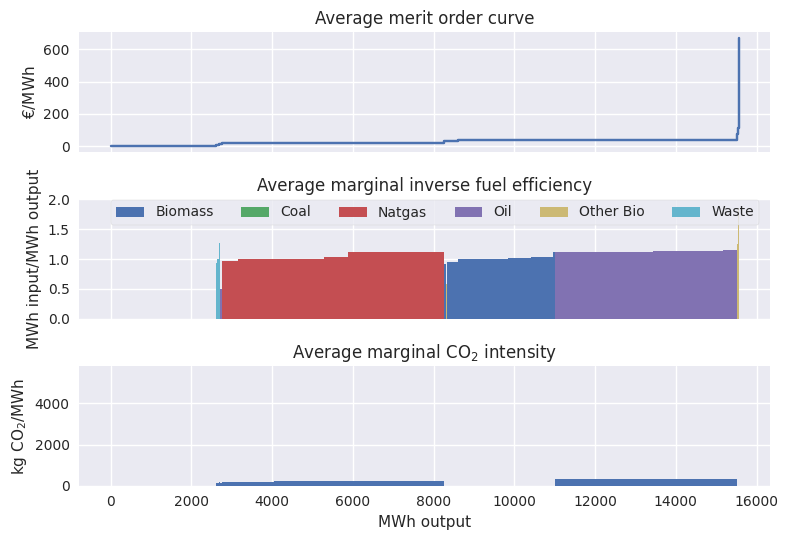

In [28]:
base_db = m.db.copy()

agg_BFt = {
    'Fueloil':'Oil','Gasoil':'Oil', 
    'Straw':'Biomass','WoodPellets':'Biomass','WoodChips':'Biomass','WoodWaste':'Biomass',
    'Biogas':'Other Bio','BioOil':'Other Bio',
    'Coal':'Coal',
    'NatGas':'Natural gas',
    'Waste':'Waste'
}

#%%capture
# Settings
ϵ=np.finfo(float).eps*1e10
lower_point=0
upper_point=m.db['MWP_H']*1.1

# Make dataframe
df_fuelineff = m.db['FuelMix'].rename(agg_BFt,level='BFt').groupby(['id','BFt']).sum().unstack('BFt').rename_axis(None,axis=1)
df = pd.concat(
    [m.hourlyGeneratingCap_H.groupby('id').agg('mean').rename('q').astype(float),m.db['mc'].rename('p').astype(float)]+
    [df_fuelineff]+
    [plantEmissionIntensity(m.db).xs('CO2',level='EmissionType').rename('m').mul(1000)]
    ,axis=1
).fillna(0)

# Sort and aggregate
df = df.sort_values(['p'])
df['q_cs'] = df['q'].transform('cumsum')

# Add upper points for step plotting
df_up = df.copy()
df_up['q_cs'] = df_up['q_cs']+ϵ
df_up['p'] = df_up['p'].shift(-1).fillna(upper_point)
df_up[df_fuelineff.columns.values] = df_up[df_fuelineff.columns.values].shift(-1)
df_up['m'] = df_up['m'].shift(-1)
df = pd.concat([df,df_up],axis=0).sort_values(['p','q_cs'])
df['q_diff'] = df['q_cs'].diff().div(2)
df['q_mean'] = df['q_cs']-df['q_diff']

# Now plot
fig, ax = plt.subplots(ncols=1,nrows=3,sharex=True,sharey=False)

# Merit order cuve:
df.set_index(['q_cs'])['p'].plot(ax=ax[0],ylabel=r'$€/$MWh',title='Average merit order curve')
for i in adj.rc_pd(m.db['id'],getTechs(['Standard'],m.db)):
    df_tmp = df.loc[i].copy()
    ax[0].text(x=df_tmp.iloc[0]['q_mean'],y=df_tmp.iloc[0]['p']-1,s=i,ha='center',va='top')

# Marginal fuel inefficiency
df.set_index(['q_cs'])[df_fuelineff.columns].plot(kind='area',linewidth=0,ax=ax[1],legend=False,stacked=True,ylabel='MWh input/MWh output',title='Average marginal inverse fuel efficiency')
ax[1].set_ylim(top=2)
fig.legend(handles=ax[1].get_legend_handles_labels()[0],loc='upper center', ncol=len(df_fuelineff.columns), frameon=True, bbox_to_anchor=(0.55,0.64))

# Marginal emission coefficient
df.set_index(['q_cs'])['m'].plot(kind='area',linewidth=0,ax=ax[2],legend=False,xlabel='MWh output',ylabel=r'kg CO$_2/$MWh',title=r'Average marginal CO$_2$ intensity')

fig.tight_layout()

What to plot?

- CO2 Emissions
- Usage of Storage
- Marginal Economic value of storage
- seasonal storage?